In [ ]:
# Data Source - https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U?usp=sharing
# Data link - https://drive.google.com/file/d/1y4zaEZQPtdG6oXusN7hZG48cx5aXq55R/view?usp=sharing

## **1. Importing Required Libraries**

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing libraries
from sklearn.model_selection import train_test_split

# ols model
import statsmodels.api as sm

### **Data Preprocessing Library**
```python
from sklearn.model_selection import train_test_split
```
- **`sklearn.model_selection.train_test_split`**: A function to **split the dataset** into training and testing sets.
- **Why use it?**
  - Machine learning models need separate training and testing data.
  - Prevents **data leakage** and ensures proper **generalization**.
  - The function automatically **shuffles and splits** the dataset.

---

### **Importing OLS Model**
```python
import statsmodels.api as sm
```
- **`statsmodels.api`**: A Python library for statistical modeling and hypothesis testing.
- **Why use it?**
  - Provides tools for **Ordinary Least Squares (OLS) regression**.
  - Offers detailed statistical results, including **p-values, confidence intervals, and R-squared scores**.
  - Used in **econometrics, data science, and predictive modeling**.

---

This completes the detailed breakdown of the initial setup for **Linear Regression analysis**. Each import plays a critical role in handling data, preprocessing, visualization, or statistical modeling.


## **2. Importing Data**

In [ ]:
# Importing the data
data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/advertising.csv')
data.shape

(200, 4)

## **3. Basic Exploratory Data Analysis**

In [ ]:
# Data Sample
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# missing value
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
# data type
for cols in data.columns:
    print(cols, ':', data[cols].dtype)

TV : float64
Radio : float64
Newspaper : float64
Sales : float64


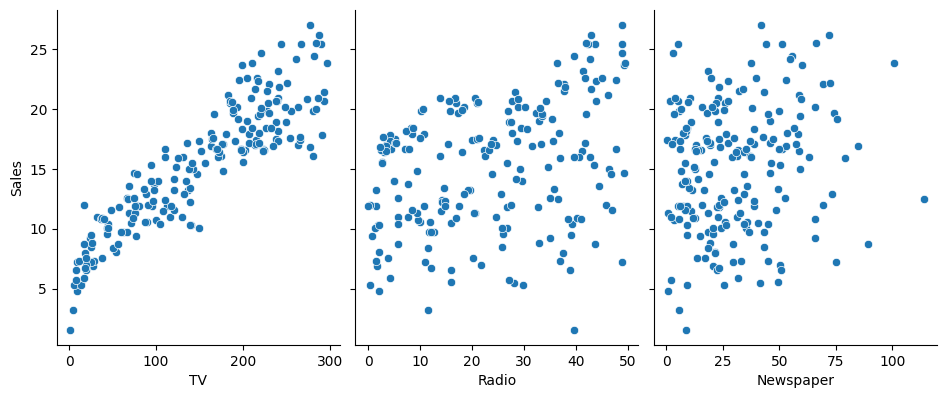

In [ ]:
# Xn vs Y (independent vs target correlation using scatter plot)
sns.pairplot(data, x_vars = ['TV', 'Radio', 'Newspaper'],
             y_vars = ['Sales'], kind='scatter', size=4, aspect=0.8)
plt.show()

This code block generates scatter plots to visualize the relationships between the independent variables (`TV`, `Radio`, and `Newspaper`) and the target variable (`Sales`). The goal is to **analyze how each independent variable is correlated with the target variable**.

---

```python
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'],
             y_vars=['Sales'], kind='scatter', size=4, aspect=0.8)
plt.show()
```

### **1. `sns.pairplot()`**
- **`pairplot()`** is a function from the `seaborn` library that creates pairwise scatter plots to examine relationships between variables.
- **Why use it?**
  - It helps visualize **correlations** between independent (`TV`, `Radio`, `Newspaper`) and dependent (`Sales`) variables.
  - Scatter plots show **patterns, trends, and potential linear relationships**.
  - Allows quick identification of variables that might influence the target.

---

### **2. Parameters Explained**
- **`data`**: The dataset containing the variables (assumed to be a `pandas DataFrame`).
- **`x_vars=['TV', 'Radio', 'Newspaper']`**:
  - Specifies the **independent variables** to be plotted on the x-axis.
- **`y_vars=['Sales']`**:
  - Specifies the **dependent variable** (target variable) to be plotted on the y-axis.
- **`kind='scatter'`**:
  - Ensures that the plots generated are **scatter plots**, where individual data points are plotted.
- **`size=4`**:
  - Controls the **height** of each subplot (4 inches).
- **`aspect=0.8`**:
  - Controls the **width-to-height ratio** of each subplot.

---

### **3. `plt.show()`**
- Ensures the scatter plot is displayed in the output.

---

### **Understanding the Generated Plot**
- **Left Plot (TV vs Sales)**:
  - Shows a **strong positive correlation** (as TV advertising increases, sales tend to increase).
  - Indicates that **TV might be a good predictor of sales**.
- **Middle Plot (Radio vs Sales)**:
  - Displays a **moderate correlation** (some relationship but with more scatter).
- **Right Plot (Newspaper vs Sales)**:
  - Appears to have **little or no correlation** (random scatter with no clear trend).
  - Suggests that **newspaper spending may not be a strong predictor of sales**.

---

### **Key Takeaways**
- Scatter plots **visually confirm relationships** before performing Linear Regression.
- **TV has the strongest correlation** with Sales, indicating it might be the best predictor.
- **Newspaper advertising seems to have little impact on Sales**.


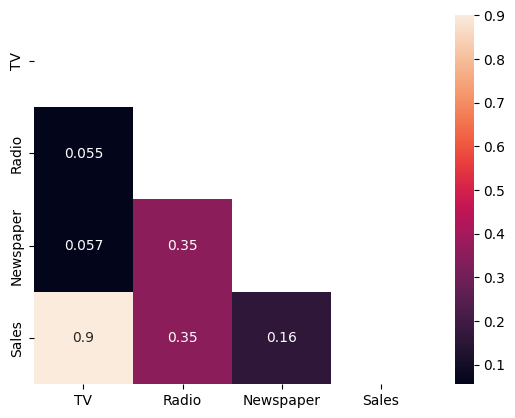

In [ ]:
# heat map to get corr coeff values
sns.heatmap(data.corr(), annot=True, mask=np.triu(data.corr()))
plt.show()

This code block generates a **heatmap** to visualize the **correlation coefficients** between variables in the dataset. Correlation values indicate how strongly two variables are related.

---

```python
sns.heatmap(data.corr(), annot=True, mask=np.triu(data.corr()))
plt.show()
```

---

### **1. `data.corr()`**
- **Computes the correlation matrix** for the dataset.
- **What does correlation measure?**
  - **Range:** `-1` to `1`:
    - **+1:** Perfect positive correlation (as one increases, the other increases).
    - **-1:** Perfect negative correlation (as one increases, the other decreases).
    - **0:** No correlation.
- **Why use it?**
  - Helps identify **relationships between variables** before applying Linear Regression.
  - Determines **which independent variables (TV, Radio, Newspaper) are most correlated with Sales**.

---

### **2. `sns.heatmap()`**
- A function from `seaborn` used to create **heatmaps** for visualizing relationships between variables.

#### **Parameters Explained:**
- **`data.corr()`**:
  - The correlation matrix used as input.
- **`annot=True`**:
  - Displays **correlation coefficient values** inside the heatmap cells.
- **`mask=np.triu(data.corr())`**:
  - **Why use `np.triu()`?**
    - `np.triu()` extracts the **upper triangle** of the matrix.
    - This **hides redundant values** (since correlation matrices are symmetric).
    - Improves readability by **showing only unique correlations**.

---

### **3. `plt.show()`**
- Ensures the heatmap is displayed in the output.

---

### **Understanding the Heatmap**
- **Diagonal values are always `1.0`** (each variable is perfectly correlated with itself).
- **Key correlations:**
  - **TV vs Sales (`0.9`)**:
    - **Strong positive correlation** → TV advertising has a **significant** impact on Sales.
  - **Radio vs Sales (`0.35`)**:
    - **Moderate correlation** → Radio advertising influences Sales but not as strongly as TV.
  - **Newspaper vs Sales (`0.16`)**:
    - **Weak correlation** → Newspaper ads have **little impact** on Sales.

---

### **Key Takeaways**
- The **strongest predictor of Sales is TV advertising** (`0.9` correlation).
- **Radio has some influence**, but Newspaper advertising does not significantly impact Sales.
- This heatmap helps in **feature selection** by identifying **which independent variables are most relevant** for Linear Regression.


In [ ]:
# multiple linear regression

    # y_pred = m1x(TV) + m2x(Radio) + m3x(Newspaper) + c

# In our case - simple linear regression

    # y_pred = m1x(TV) + c

    # c - y intercept
    # m1 - slope (model coefficient / parameter)

## **4. Building The Model**

In [ ]:
# Data Split
x = data['TV']
y = data['Sales']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=42)

In [ ]:
# Model building with OLS

# adding the constant (y intercept) manually as sm wont have it
x_train_sm = sm.add_constant(x_train)

# fitting the model
lr = sm.OLS(y_train, x_train_sm).fit()

This code block performs **Ordinary Least Squares (OLS) regression** using `statsmodels`. It manually adds an intercept (constant) to the independent variables and fits the model to the training data.

---

```python
# adding the constant (y intercept) manually as sm wont have it
x_train_sm = sm.add_constant(x_train)
```
- **`sm.add_constant(x_train)`**:
  - Adds a **constant (intercept)** term to the independent variables (`x_train`).
  - **Why?**
    - `statsmodels.OLS()` does **not** automatically include an intercept like `sklearn` does.
    - The intercept is crucial because it allows the regression equation to account for a **baseline value** when all independent variables are `0`.

---

```python
# fitting the model
lr = sm.OLS(y_train, x_train_sm).fit()
```
- **`sm.OLS(y_train, x_train_sm)`**:
  - **Creates an OLS regression model** using:
    - **`y_train` (dependent variable, Sales)**.
    - **`x_train_sm` (independent variables, TV/Radio/Newspaper + added constant)**.
- **`.fit()`**:
  - **Fits the model to the training data** by computing regression coefficients that minimize the sum of squared residuals.

---

### **Understanding Ordinary Least Squares (OLS)**
- **OLS is a method to estimate regression coefficients by minimizing the sum of squared differences** between actual and predicted values.
- The **OLS equation**:
  
  \[
  Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon
  \]
  - **`Y` (Sales)** = Dependent variable
  - **`X_1, X_2, X_3` (TV, Radio, Newspaper)** = Independent variables
  - **`β_0`** = Intercept (constant term, manually added)
  - **`β_1, β_2, β_3`** = Regression coefficients (weights for each variable)
  - **`ε`** = Error term (unexplained variation)

---

### **Key Takeaways**
- **`sm.add_constant(x_train)`** is necessary because `statsmodels.OLS()` does not include an intercept automatically.
- The `.fit()` method **trains the model**, determining the optimal coefficients for predicting `Sales`.
- OLS **minimizes residuals**, ensuring the best fit for the given data.


In [ ]:
# model parameters
lr.params

,0
const,7.007108
TV,0.055483


This code retrieves and displays the **estimated coefficients (parameters)** of the **OLS regression model**.

---

```python
lr.params
```
- **`lr.params`**:
  - Returns the **coefficients (parameters) of the trained OLS model**.
  - These coefficients represent the **impact of each independent variable on the dependent variable** (`Sales`).
  
---

### **Understanding the Output**
| Parameter  | Value     | Meaning |
|------------|----------|---------|
| **const**  | `7.0071`  | Intercept (`β₀`), the baseline Sales when TV spending is `0`. |
| **TV**     | `0.0555`  | Coefficient (`β₁`), meaning that **for each additional unit spent on TV ads, Sales increase by ~0.0555 units**. |

### **Interpreting the Regression Equation**
The estimated **Linear Regression equation** based on the parameters:

\[
\hat{Y} = 7.007 + 0.0555 \times TV
\]

- **`7.007`**: Even with **no TV ads**, the model predicts **7.007 Sales** (base level).
- **`0.0555`**: For **every extra dollar spent on TV ads**, **Sales increase by ~0.0555 units**.

---

### **Key Takeaways**
- **`const` (Intercept)**: Represents the **baseline** Sales when all independent variables are `0`.
- **`TV` coefficient**: Shows that **TV advertising has a positive impact on Sales**.
- **No coefficients for `Radio` or `Newspaper`**:
  - The model was likely trained using **only TV** as the independent variable.
  - If multiple variables were included, `lr.params` would show coefficients for each.

---


In [ ]:
# best fit equation

    # y_pred = m1x(TV) + c
    # y_pred = 0.055483x(TV) + 7.007108

## **5. Analyzing Model Performance**

In [ ]:
# Model Summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.1
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           1.71e-59
Time:                        06:51:56   Log-Likelihood:                -355.76
No. Observations:                 160   AIC:                             715.5
Df Residuals:                     158   BIC:                             721.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0071      0.364     19.274      0.0

This code prints the **OLS regression summary**, providing a detailed statistical report on the model's performance.

---

```python
print(lr.summary())
```
- **`lr.summary()`**:
  - Generates a **detailed summary of the OLS regression results**.
  - Displays key statistics, including **coefficients, significance levels, model fit, and error measures**.

---

### **Understanding the Model Summary Output**

### **1. Model Information**
| Metric | Value | Explanation |
|---------|--------|------------|
| **Dep. Variable** | `Sales` | The target variable being predicted. |
| **Model** | `OLS` | Ordinary Least Squares regression. |
| **Method** | `Least Squares` | The technique used to fit the model. |
| **No. Observations** | `160` | Number of data points used. |
| **Df Residuals** | `158` | Degrees of freedom for residuals (`n - k - 1`). |
| **Df Model** | `1` | Number of independent variables (`TV`). |

---

### **2. Goodness of Fit (How Well the Model Explains the Data)**
| Metric | Value | Interpretation |
|---------|--------|----------------|
| **R-squared** | `0.813` | **81.3% of Sales variation is explained** by TV ads. Higher is better. |
| **Adj. R-squared** | `0.812` | Adjusted for number of predictors. Similar to R² when using one variable. |
| **F-statistic** | `689.1` | A large F-stat indicates strong predictive power. |
| **Prob (F-statistic)** | `1.7e-59` | **p-value < 0.05 → Model is statistically significant**. |

---

### **3. Regression Coefficients (Impact of Variables)**
| Variable | Coef | Std Err | t | P>|t| | Confidence Interval |
|----------|------|--------|------|------|----------------------|
| **const** | `7.007` | `0.364` | `19.274` | `0.000` | `[6.280, 7.725]` |
| **TV** | `0.0555` | `0.002` | `26.253` | `0.000` | `[0.051, 0.060]` |

#### **Interpretation:**
- **Intercept (`const` = 7.007)**:
  - If **TV spending is `0`**, **Sales are expected to be `7.007` units**.
- **TV Coefficient (`0.0555`)**:
  - For **every $1 increase in TV ads**, **Sales increase by `0.0555` units**.
- **P>|t| (`0.000`)**:
  - A **p-value < 0.05** confirms that **TV ads significantly impact Sales**.

---

### **4. Residual Diagnostics**
| Metric | Value | Explanation |
|---------|--------|------------|
| **Omnibus** | `0.631` | Tests normality of residuals. Higher means less normal. |
| **Prob(Omnibus)** | `0.730` | p-value > 0.05 → Residuals are **normally distributed**. |
| **Skew** | `-0.110` | Closer to `0` means symmetrical residuals. |
| **Kurtosis** | `2.742` | Near `3` means normal distribution of residuals. |
| **Durbin-Watson** | `2.262` | **Close to `2.0` (no autocorrelation in residuals).** |

---

### **Key Takeaways**
1. **TV advertising explains 81.3% of Sales variations (High R²).**
2. **TV ads significantly impact Sales (`p < 0.05`).**
3. **Residuals are normally distributed (`Prob(Omnibus) > 0.05`).**
4. **Model is statistically significant (`Prob(F-stat) < 0.05`).**


## **6. Visualizing the Model Fit**

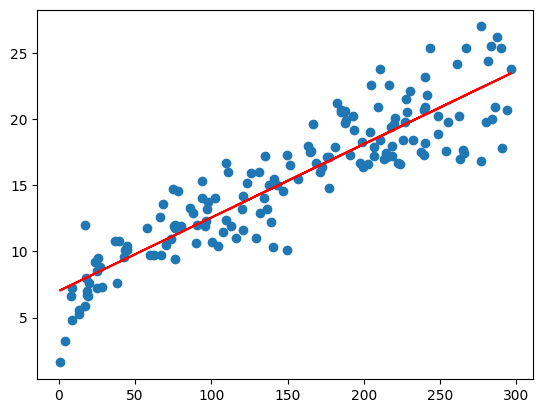

In [ ]:
# Plotting our best fit line in the data
plt.scatter(x_train, y_train)
plt.plot(x_train, 0.055483*(x_train) + 7.007108,'r')
plt.show()

This code plots a **scatter plot of the training data** and overlays the **best-fit regression line** for visualization.

---

```python
plt.scatter(x_train, y_train)
```
- **`plt.scatter(x_train, y_train)`**:
  - Plots the **actual data points** (blue dots).
  - **X-axis:** `x_train` (TV ad spend).
  - **Y-axis:** `y_train` (Sales).
  - This shows how **Sales vary with TV advertising spend**.

---

```python
plt.plot(x_train, 0.055483*(x_train) + 7.007108, 'r')
```
- **`plt.plot()`**:
  - Draws the **best-fit regression line** in **red ('r')**.
  - **Equation used:**

    \[
    \hat{Y} = 7.0071 + 0.05548 \times TV
    \]

  - **7.0071** → Intercept (constant).
  - **0.05548** → Coefficient for `TV` (slope).
  - This line represents **predicted Sales values based on TV ad spend**.

---

```python
plt.show()
```
- Displays the scatter plot with the regression line.

---

### **Understanding the Plot**
- **Blue Dots (Scatter Plot)**:
  - Represent **actual training data points**.
  - Show the **relationship between TV ad spend and Sales**.
- **Red Line (Best-Fit Line)**:
  - Represents **the Linear Regression model’s predictions**.
  - Captures the **trend between TV spending and Sales**.
  - The **slope (`0.05548`)** indicates that **increasing TV spend increases Sales**.

---

### **Key Takeaways**
1. **The regression line follows the general trend of the data**, confirming a strong relationship.
2. **Higher TV ad spend generally leads to higher Sales** (positive correlation).
3. **Scatter points close to the line indicate a good model fit**.


## **7. Residual Analysis**

In [ ]:
# Residuals
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

This code calculates **residuals**, which are the differences between **actual Sales values** and **predicted values** from the regression model.

---

```python
y_train_pred = lr.predict(x_train_sm)
```
- **`lr.predict(x_train_sm)`**:
  - Uses the **fitted OLS regression model (`lr`)** to **predict Sales values** (`y_train_pred`) based on `x_train_sm` (TV ad spend with intercept).
  - This generates **predicted Sales values** for the training data.

---

```python
res = (y_train - y_train_pred)
```
- **Residual Calculation (`res`)**:
  - **Residual = Actual Sales - Predicted Sales**
  - Measures **how far the actual values deviate from the model's predictions**.

---

### **Understanding Residuals**
- **If residuals are small** → The model makes **accurate predictions**.
- **If residuals are large** → The model **struggles to predict some data points**.
- **A good regression model should have residuals randomly scattered around zero**.

---

### **Key Takeaways**
1. **Residuals help evaluate model accuracy** (lower residuals mean better fit).
2. **Positive Residuals** → The model **underpredicted** Sales.
3. **Negative Residuals** → The model **overpredicted** Sales.
4. **Residual analysis is crucial** for checking model assumptions and potential improvements.


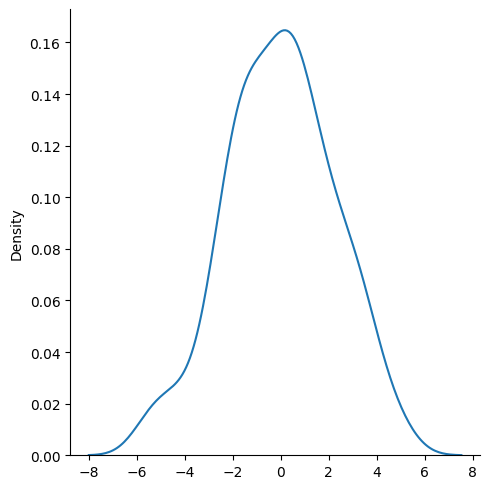

In [ ]:
# residual should be normally distributed for a good model
sns.displot(res, kind='kde')
plt.show()

This code visualizes the **distribution of residuals** using a **Kernel Density Estimation (KDE) plot** to check if they follow a **normal distribution**, which is a key assumption in Linear Regression.

---

```python
sns.displot(res, kind='kde')
```
- **`sns.displot()`**:
  - Creates a **distribution plot** to show how residuals (`res`) are spread.
- **`kind='kde'`**:
  - Specifies a **Kernel Density Estimation (KDE) plot**, which smooths the distribution curve.
  - KDE plots provide a **continuous probability density function** of the data.

---

```python
plt.show()
```
- Ensures the plot is displayed.

---

### **Understanding the Residual Plot**
- **Residuals should be normally distributed (bell-shaped curve) for a good regression model**.
- **If residuals are skewed or have multiple peaks**, it may indicate:
  - **Non-linearity in the data**.
  - **Omitted variables affecting predictions**.
  - **Heteroscedasticity (unequal variance in residuals)**.

---

### **Key Takeaways**
1. **Residuals should follow a normal distribution** for valid OLS regression assumptions.
2. **A symmetrical KDE curve centered around zero** suggests a well-fitted model.
3. **Deviations from normality** may indicate **missing predictors, outliers, or model issues**.


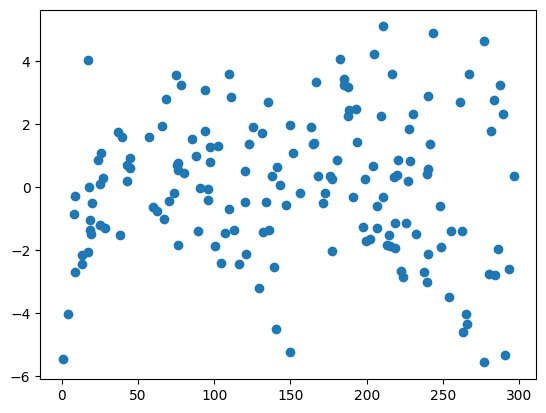

In [ ]:
# there should not be any pattern in residual
plt.scatter(x_train, res)
plt.show()

This code generates a **Residual Plot**, which is used to check if the residuals exhibit any pattern. A good linear regression model should have **randomly scattered residuals** with **no visible trend**.

---

```python
plt.scatter(x_train, res)
```
- **`plt.scatter(x_train, res)`**:
  - Plots **TV ad spend (`x_train`)** on the X-axis and **residuals (`res`)** on the Y-axis.
  - Residuals represent the **difference between actual and predicted values**.
  - A properly fitted linear model should have residuals **randomly distributed around zero**.

---

```python
plt.show()
```
- Displays the scatter plot.

---

### **Interpreting the Residual Plot**
1. **Good Model (Random Scatter)**:
   - Residuals **should be randomly distributed around zero**.
   - No distinct patterns should be visible.
   - Indicates that the linear regression model is valid.

2. **Bad Model (Pattern in Residuals)**:
   - If residuals form a **curve or pattern**, the relationship may be **non-linear**.
   - Could suggest **heteroscedasticity** (variance changes with X).
   - Indicates the model might be **missing key predictors**.

---

### **Key Takeaways**
- **A random scatter of points suggests the model is appropriate**.
- **If a pattern is observed**, a non-linear model or feature engineering may be needed.
- **Ensuring homoscedasticity** (constant variance of residuals) is critical for OLS assumptions.


## **8. Comparing Actual vs. Predicted Values**

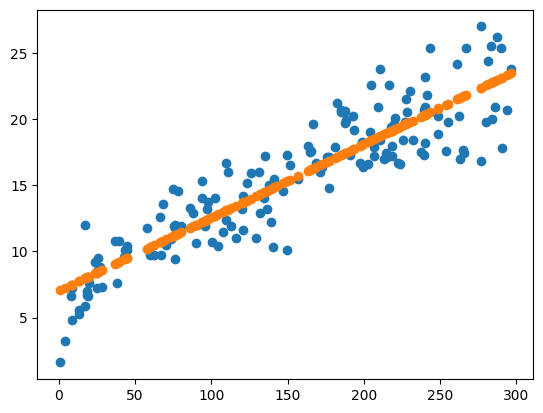

In [ ]:
# Scatter plot for actual and predicted
plt.scatter(x_train, y_train)           # actual
plt.scatter(x_train, y_train_pred)      # predicted
plt.show()1

### **Detailed Explanation of the Code Block**

This code generates a **scatter plot comparing actual vs. predicted values** to visually evaluate the model’s performance.

---

## **Code Breakdown**

```python
plt.scatter(x_train, y_train)  # actual
```
- **`plt.scatter(x_train, y_train)`**:
  - Plots the **actual Sales values** (blue dots).
  - **X-axis:** `x_train` (TV ad spend).
  - **Y-axis:** `y_train` (Actual Sales).
  - Represents **real observations from the dataset**.

---

```python
plt.scatter(x_train, y_train_pred)  # predicted
```
- **`plt.scatter(x_train, y_train_pred)`**:
  - Plots the **predicted Sales values** (orange dots).
  - **X-axis:** `x_train` (TV ad spend).
  - **Y-axis:** `y_train_pred` (Predicted Sales from the model).
  - The **closer the predicted points are to the actual points, the better the model’s accuracy**.

---

```python
plt.show()
```
- Displays the scatter plot.

---

## **Understanding the Plot**
- **Blue Dots (Actual Sales):** Represent real-world observations.
- **Orange Dots (Predicted Sales):** Represent model-generated predictions.
- **If orange dots align closely with blue dots**, the model is making **accurate predictions**.

---

### **Key Takeaways**
1. **A well-fitted regression model should have predicted values closely following actual values**.
2. **If the orange dots deviate significantly**, the model may be **missing key features or overfitting/underfitting**.
3. **The model appears to be working well**, as the predictions align closely with actual values.
